In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dollar_to_pesos = pd.read_csv('DEXMXUS.csv')
dollar_to_pesos.head()

,DATE,DEXMXUS
0,2014-09-08,13.0755
1,2014-09-09,13.2040
2,2014-09-10,13.2090
3,2014-09-11,13.2120
4,2014-09-12,13.2485


In [12]:
favour_polls = pd.read_csv('favorability_polls.csv')

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'start_date', 'end_date', 'sponsor_candidate_id',
       'sponsor_candidate', 'sponsor_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'source', 'internal',
       'partisan', 'imputed_sample_size', 'politician_id', 'politician',
       'favorable', 'unfavorable', 'alternate_answers', 'very_favorable',
       'somewhat_favorable', 'somewhat_unfavorable', 'very_unfavorable'],
      dtype='object')

In [19]:
trump_favour = favour_polls[favour_polls['politician'] == 'Donald Trump']
trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')
trump_favour = trump_favour[['DATE','politician', 'favorable']].reset_index(drop=True)
trump_favour.head()

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_4497/2312294248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')


,DATE,politician,favorable
0,2024-09-06,Donald Trump,44.5
1,2024-09-06,Donald Trump,45.6
2,2024-09-06,Donald Trump,46.9
3,2024-09-06,Donald Trump,44.0
4,2024-09-03,Donald Trump,46.0


In [26]:
dollar_to_pesos['DATE'] = pd.to_datetime(dollar_to_pesos['DATE'], format='%Y-%m-%d')
dollar_to_pesos

,DATE,DEXMXUS
0,2014-09-08,13.0755
1,2014-09-09,13.2040
2,2014-09-10,13.2090
3,2014-09-11,13.2120
4,2014-09-12,13.2485
...,...,...
2605,2024-09-02,.
2606,2024-09-03,19.83
2607,2024-09-04,19.8161
2608,2024-09-05,19.9926


In [27]:
merged_data = pd.merge(dollar_to_pesos, trump_favour, on='DATE', how='inner')


In [28]:
merged_data

,DATE,DEXMXUS,politician,favorable
0,2020-11-04,20.936,Donald Trump,37.0
1,2020-11-05,20.834,Donald Trump,42.0
2,2020-11-06,20.63,Donald Trump,41.0
3,2020-11-10,20.433,Donald Trump,41.0
4,2020-11-10,20.433,Donald Trump,42.0
...,...,...,...,...
882,2024-09-04,19.8161,Donald Trump,47.0
883,2024-09-06,20.0399,Donald Trump,44.5
884,2024-09-06,20.0399,Donald Trump,45.6
885,2024-09-06,20.0399,Donald Trump,46.9


In [33]:
# look at specific time frame:
trump_favour_2024 = trump_favour[trump_favour['DATE'] > '2024']

In [35]:
merged_data_2024 = pd.merge(dollar_to_pesos, trump_favour_2024, on='DATE', how='inner')


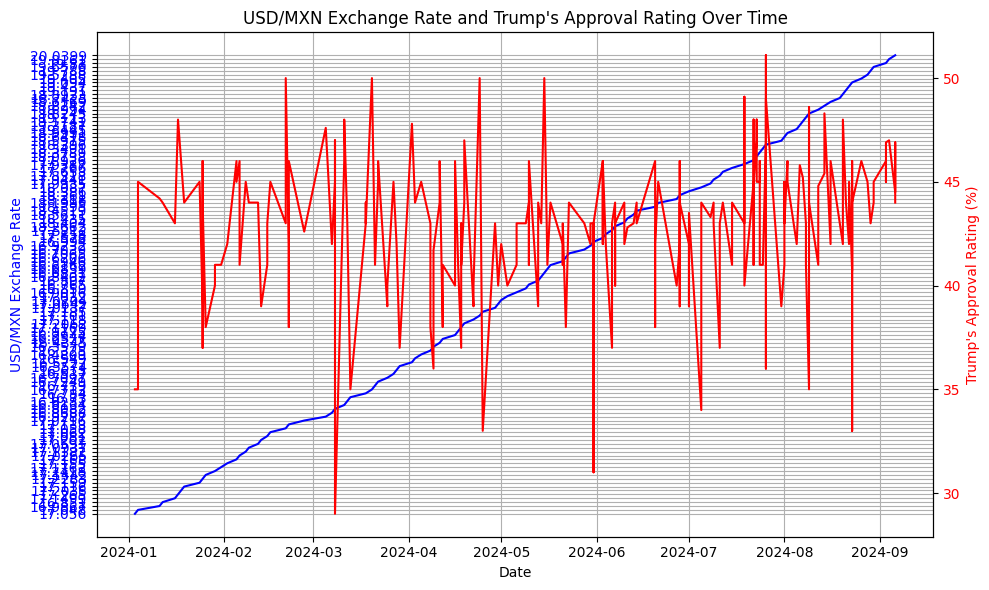

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot exchange rate on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('USD/MXN Exchange Rate', color='blue')
ax1.plot(merged_data_2024['DATE'], merged_data_2024['DEXMXUS'], label='USD/MXN Exchange Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis to plot approval rating
ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis
ax2.set_ylabel("Trump's Approval Rating (%)", color='red')
ax2.plot(merged_data_2024['DATE'], merged_data_2024['favorable'], label="Trump's Approval Rating", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and show plot
plt.title('USD/MXN Exchange Rate and Trump\'s Approval Rating Over Time')
fig.tight_layout()  # to prevent overlap of labels
plt.show()

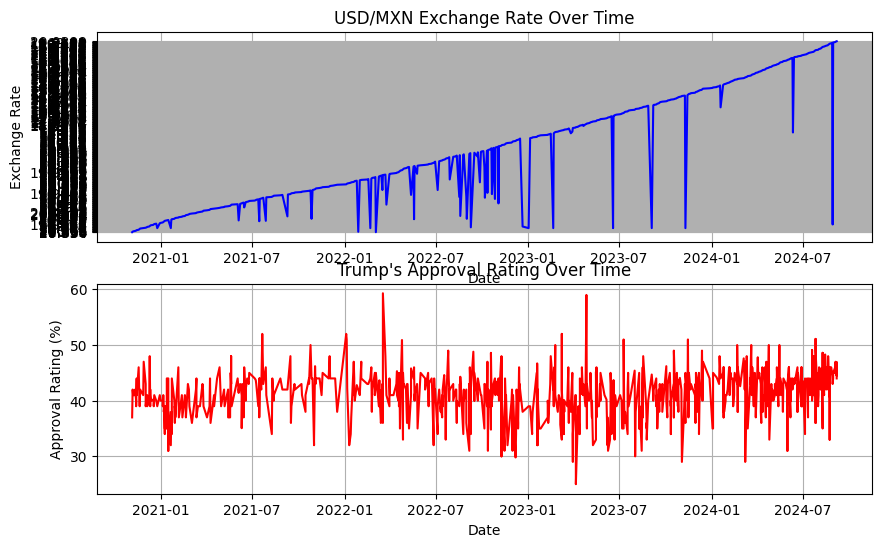

In [31]:
plt.figure(figsize=(10,6))

# Plot exchange rate
plt.subplot(2, 1, 1)
plt.plot(merged_data['DATE'], merged_data['DEXMXUS'], label='USD/MXN Exchange Rate', color='blue')
plt.title('USD/MXN Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot approval rating
plt.subplot(2, 1, 2)
plt.plot(merged_data['DATE'], merged_data['favorable'], label="Trump's Approval Rating", color='red')
plt.title("Trump's Approval Rating Over Time")
plt.xlabel('Date')
plt.ylabel('Approval Rating (%)')
plt.grid(True)

plt.show()